In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguegamefinder, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings("ignore")

# Team Standings

In [2]:
all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

In [3]:
mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [4]:
league_standings = leaguestandings.LeagueStandings().get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Lakers,113.2,106.9
1,Bucks,118.7,107.9
2,Raptors,112.6,106.4
3,Clippers,116.3,109.7
4,Celtics,113.8,107.3
5,Nuggets,111.2,108.6
6,Rockets,118.4,114.6
7,Heat,112.3,109.1
8,Pacers,109.6,107.6
9,Thunder,110.4,108.1


# Getting Team 2019 Game Data

In [5]:
nba_teams = teams.get_teams()
mavs_id = [team for team in nba_teams
         if team['full_name'] == 'Dallas Mavericks'][0]['id']
opponent_id = [team for team in nba_teams
         if team['full_name'] == 'Milwaukee Bucks'][0]['id']

In [6]:
from nba_api.stats.endpoints import teamplayerdashboard
mavs_season_stats = teamplayerdashboard.TeamPlayerDashboard(mavs_id).get_data_frames()[1]
mavs_season_stats['PPG'] = mavs_season_stats['PTS']/mavs_season_stats['GP']
mavs_season_stats['MPG'] = mavs_season_stats['MIN']/mavs_season_stats['GP']
mavs_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,1628499,Antonius Cleveland,9,5,4,0.556,29.171667,2,8,0.250,0,2,0.000,3,4,0.750,0,3,3,0,1,1,1,1,4,2,7,-7,15.6,0,0,16,17,4,14,18,17,17,17,16,17,16,17,17,14,18,18,18,18,18,18,17,4,2,17,17,17,18,10,2,0.777778,3.241296
1,Players,1626246,Boban Marjanovic,41,20,21,0.488,360.408333,104,185,0.562,4,15,0.267,37,50,0.740,59,108,167,15,26,7,8,13,53,46,249,66,490.9,5,0,10,11,10,18,12,11,11,3,15,15,14,10,10,15,7,11,8,12,11,12,10,11,9,10,11,9,11,3,2,6.073171,8.790447
2,Players,201584,Courtney Lee,24,15,9,0.625,345.488333,40,82,0.488,21,47,0.447,6,7,0.857,7,25,32,12,11,18,6,0,33,5,107,39,224.4,0,0,13,12,7,2,13,13,13,5,11,12,2,14,15,4,14,15,15,13,13,10,11,1,8,14,13,11,13,10,2,4.458333,14.395347
3,Players,1626153,Delon Wright,69,40,29,0.580,1486.456667,183,394,0.464,47,123,0.382,76,96,0.792,67,200,267,230,70,79,22,29,88,90,489,47,1387.4,1,0,2,1,17,10,7,7,7,8,7,8,6,6,6,12,6,5,5,2,3,1,4,15,12,6,7,10,6,7,2,7.086957,21.542850
4,Players,1627827,Dorian Finney-Smith,68,39,29,0.574,2035.931667,227,494,0.460,105,285,0.368,77,106,0.726,139,251,390,107,69,45,38,30,170,85,636,262,1444.5,4,0,3,3,17,11,1,5,5,10,6,6,9,5,5,16,1,4,3,6,4,3,3,16,18,8,5,3,5,4,2,9.352941,29.940172
5,Players,203939,Dwight Powell,40,25,15,0.625,1060.538333,146,229,0.638,10,39,0.256,74,111,0.667,75,152,227,59,36,34,22,13,102,116,376,195,868.9,1,0,11,10,9,2,8,9,10,2,13,13,15,8,4,17,4,7,6,10,9,7,4,11,13,5,9,5,9,7,2,9.400000,26.513458
6,Players,200826,J.J. Barea,27,14,13,0.519,404.481667,74,182,0.407,29,76,0.382,18,20,0.900,10,39,49,100,35,5,2,7,25,38,195,30,389.8,0,0,12,13,8,16,11,12,12,14,10,10,7,12,12,2,13,13,13,7,10,13,15,8,7,12,12,12,12,10,2,7.222222,14.980802
7,Players,1628973,Jalen Brunson,57,34,23,0.596,1022.073333,181,388,0.466,43,120,0.358,61,75,0.813,22,112,134,188,66,22,4,11,74,118,466,172,920.8,2,0,8,8,11,6,9,8,8,7,9,9,10,9,9,8,11,10,11,3,5,8,13,9,11,4,8,7,8,5,2,8.175439,17.931111
8,Players,1629729,Josh Reaves,2,1,1,0.500,1.485000,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,-5,0.0,0,0,19,18,1,17,19,19,19,19,16,19,16,19,19,19,18,19,19,18,19,19,18,1,1,19,19,16,19,10,2,0.000000,0.742500
9,Players,1628382,Justin Jackson,61,37,24,0.607,966.696667,127,320,0.397,47,157,0.299,36,44,0.818,27,119,146,49,12,13,10,14,61,41,337,22,642.7,0,0,5,5,13,4,10,10,9,15,7,7,13,11,11,7,8,8,9,11,12,11,8,13,10,11,10,13,10,10,2,5.524590,15.847486


In [7]:
opponent_season_stats = teamplayerdashboard.TeamPlayerDashboard(opponent_id).get_data_frames()[1]
opponent_season_stats['PPG'] = opponent_season_stats['PTS']/opponent_season_stats['GP']
opponent_season_stats['MPG'] = opponent_season_stats['MIN']/opponent_season_stats['GP']

opponent_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,201572,Brook Lopez,64,52,12,0.813,1714.125000,261,608,0.429,88,295,0.298,114,138,0.826,50,242,292,97,67,46,159,21,156,123,724,532,1767.9,4,0,2,2,12,9,3,4,4,11,4,2,13,4,4,6,6,3,4,6,5,5,1,12,16,4,4,3,4,4,2,11.312500,26.783203
1,Players,1628391,D.J. Wilson,34,28,6,0.824,301.376667,43,113,0.381,15,62,0.242,7,12,0.583,11,67,78,22,16,2,5,3,27,16,108,-38,239.6,0,0,13,13,4,6,13,13,13,15,13,13,15,13,14,15,14,13,13,13,13,15,13,2,4,13,13,17,13,8,2,3.176471,8.864020
2,Players,1628978,Donte DiVincenzo,63,53,10,0.841,1451.783333,223,484,0.461,80,237,0.338,60,80,0.750,61,240,301,149,80,82,18,24,105,91,586,403,1390.7,1,0,3,1,6,2,6,5,5,9,6,5,9,7,7,10,2,4,3,5,4,1,6,13,13,6,5,6,5,6,2,9.301587,23.044180
3,Players,1627733,Dragan Bender,7,7,0,1.000,90.726667,10,21,0.476,4,9,0.444,2,3,0.667,0,20,20,9,5,0,5,4,16,5,26,44,73.5,0,0,16,16,1,1,16,16,17,8,15,16,2,17,17,12,17,15,15,16,17,17,13,4,3,17,16,12,16,8,2,3.714286,12.960952
4,Players,202339,Eric Bledsoe,58,48,10,0.828,1564.985000,323,675,0.479,73,207,0.353,163,201,0.811,43,226,269,311,143,55,25,38,122,167,882,469,1768.3,2,0,9,7,6,4,5,3,3,6,8,7,7,3,3,7,9,6,6,2,2,3,5,16,14,2,3,5,3,5,2,15.206897,26.982500
5,Players,101141,Ersan Ilyasova,60,47,13,0.783,942.753333,143,300,0.477,49,129,0.380,67,81,0.827,60,231,291,49,34,24,16,13,91,77,402,89,910.7,5,0,7,8,14,12,9,8,8,7,9,10,5,6,6,5,3,5,5,10,12,10,7,8,11,8,8,9,8,3,2,6.700000,15.712556
6,Players,1628412,Frank Mason,7,5,2,0.714,70.495000,9,28,0.321,2,13,0.154,5,8,0.625,3,7,10,15,9,2,0,4,6,7,25,-3,56.5,0,0,16,17,2,16,17,17,16,17,16,15,16,15,15,14,16,17,17,15,15,15,17,4,1,16,17,15,17,8,2,3.571429,10.070714
7,Players,201588,George Hill,56,46,10,0.821,1201.028333,185,351,0.527,75,159,0.472,81,97,0.835,47,119,166,168,54,45,5,20,80,94,526,273,1073.2,0,0,10,9,6,7,7,6,7,3,7,8,1,5,5,3,7,10,9,4,7,6,13,11,9,5,6,7,6,8,2,9.392857,21.446935
8,Players,203507,Giannis Antetokounmpo,61,50,11,0.820,1873.308333,671,1209,0.555,88,286,0.308,381,603,0.632,136,698,834,352,223,60,61,68,187,498,1811,686,3479.8,55,4,6,5,9,8,1,1,1,1,4,4,11,1,1,13,1,1,1,1,1,2,2,17,17,1,1,1,1,1,1,29.688525,30.709973
9,Players,203114,Khris Middleton,59,46,13,0.780,1770.655000,452,910,0.497,145,348,0.417,196,214,0.916,44,324,368,247,125,53,7,37,134,156,1245,539,2112.1,6,0,8,9,14,13,2,2,2,5,1,1,3,2,2,2,8,2,2,3,3,4,10,15,15,3,2,2,2,2,2,21.101695,30.011102


In [8]:
# The first DataFrame of those returned is what we want.
curr_mavs_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=mavs_id).get_data_frames()[0]
opponent_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=opponent_id).get_data_frames()[0]

curr_mavs_season = curr_mavs_season[curr_mavs_season['SEASON_ID'] == "22019"]
opponent_season = opponent_season[opponent_season['SEASON_ID'] == "22019"]

## Variance in Player Rotation
Preseason will have greater variance in player rotations. The goal is to use that to forecast PPG and OPPG

In [9]:
def missing_mins(curr_game_id, team_id, df):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(df, player_game_stats, how='left', on='PLAYER_ID')
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MPG'].sum()
    return missing_mins

In [10]:
def variance(curr_game_id, team_id):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    minutes = curr_game[curr_game['TEAM_ID'] == int(team_id)]['MIN']
    minutes = minutes.apply(lambda x: int(x[:-3])*60+int(x[-2:]))
    minutes = minutes[minutes != 0]
    return minutes.var()

In [11]:
def create_table(season_copy, season_stats):
    curr_copy = season_copy[:]
    
    curr_copy['datetime'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    curr_copy['reg_season'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') >= datetime(2019, 10, 22))

    curr_copy['OPTS'] = curr_copy['PTS'] - curr_copy['PLUS_MINUS']
    
    #filtering for only NBA teams
    curr_copy = curr_copy[curr_copy['MATCHUP'].apply(lambda x: x[-3:] in mapping)]
    
    curr_copy['OPP_TEAM_ID'] = curr_copy['MATCHUP'].apply(lambda x: mapping[x[-3:]])
    
    curr_copy['PPG_a'] = curr_copy['TEAM_ID'].apply(lambda x: league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_a'] = curr_copy['TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])
    
    curr_copy['PPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])

    curr_copy['O_COEF'] = curr_copy['PTS'] / (curr_copy['PPG_a'] + curr_copy['OPPG_b'])
    curr_copy['D_COEF'] = curr_copy['OPTS'] / (curr_copy['PPG_b'] + curr_copy['OPPG_a'])
    
    print('variance')
    curr_copy['VARIANCE'] = curr_copy.apply(lambda x: variance(x['GAME_ID'], x['TEAM_ID']), axis = 1)
    
    print('missing mins')
    curr_copy['MISSING_MINS'] = curr_copy.apply(lambda x: missing_mins(x['GAME_ID'], x['TEAM_ID'], season_stats), axis = 1)
    
    return curr_copy
    

In [12]:
curr_mavs_season_copy = create_table(curr_mavs_season, mavs_season_stats)
curr_mavs_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612742,DAL,Dallas Mavericks,0021901271,2020-08-06,DAL vs. LAC,L,240,111,39,87,0.448,17,48,0.354,16,21,0.762,8,29,37,24,3,4,7,17,-15.0,2020-08-06,True,126.0,1610612746,116.7,111.2,116.3,109.7,0.490283,0.553846,513217.000000,133.066001
1,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,116.7,111.2,109.7,111.8,0.498906,0.497963,706101.072727,114.843903
2,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,116.7,111.2,112.9,113.7,0.499132,0.522088,582489.555556,120.991372
3,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,116.7,111.2,118.4,114.6,0.644185,0.666376,821757.472727,105.143885
7,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,116.7,111.2,111.2,108.6,0.501553,0.472122,454069.500000,177.432634
8,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,116.7,111.2,113.8,115.3,0.469828,0.483556,522427.750000,142.945654
9,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,116.7,111.2,109.6,107.6,0.485956,0.507246,683587.777778,145.830664
10,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,116.7,111.2,112.8,113.8,0.524946,0.428571,344142.290909,142.539281
11,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,116.7,111.2,115.9,116.9,0.543664,0.541612,911390.444444,122.917298
12,22019,1610612742,DAL,Dallas Mavericks,0021900907,2020-03-02,DAL @ CHI,L,241,107,40,84,0.476,12,42,0.286,15,20,0.750,9,35,44,26,9,5,16,20,-2.0,2020-03-02,True,109.0,1610612741,116.7,111.2,106.8,109.9,0.472198,0.500000,484079.777778,151.655710


In [13]:
opponent_season_copy = create_table(opponent_season, opponent_season_stats)
opponent_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612749,MIL,Milwaukee Bucks,0021901269,2020-08-06,MIL vs. MIA,W,239,130,41,78,0.526,15,37,0.405,33,38,0.868,5,39,44,27,7,3,14,21,14.0,2020-08-06,True,116.0,1610612748,118.7,107.9,112.3,109.1,0.570676,0.526794,381431.272727,51.343345
1,22019,1610612749,MIL,Milwaukee Bucks,0021901256,2020-08-04,MIL vs. BKN,L,241,116,42,88,0.477,17,51,0.333,15,23,0.652,7,47,54,28,3,5,18,19,-3.0,2020-08-04,True,119.0,1610612751,118.7,107.9,111.3,112.2,0.502382,0.542883,37560.897436,69.601009
2,22019,1610612749,MIL,Milwaukee Bucks,0021901248,2020-08-02,MIL @ HOU,L,240,116,45,92,0.489,9,35,0.257,17,23,0.739,17,48,65,21,6,6,22,23,-4.0,2020-08-02,True,120.0,1610612745,118.7,107.9,118.4,114.6,0.497214,0.530270,464307.356061,73.556138
3,22019,1610612749,MIL,Milwaukee Bucks,0021901236,2020-07-31,MIL vs. BOS,W,241,119,39,84,0.464,13,41,0.317,28,34,0.824,7,40,47,25,9,7,15,26,7.0,2020-07-31,True,112.0,1610612738,118.7,107.9,113.8,107.3,0.526549,0.505187,366191.290909,92.828757
7,22019,1610612749,MIL,Milwaukee Bucks,0021900958,2020-03-09,MIL @ DEN,L,239,95,34,90,0.378,15,50,0.300,12,18,0.667,11,37,48,23,8,4,17,15,-14.0,2020-03-09,True,109.0,1610612743,118.7,107.9,111.2,108.6,0.417950,0.497490,162460.361111,191.211463
8,22019,1610612749,MIL,Milwaukee Bucks,0021900950,2020-03-08,MIL @ PHX,L,240,131,51,95,0.537,13,33,0.394,16,21,0.762,7,29,36,23,7,3,10,29,-9.0,2020-03-08,True,140.0,1610612756,118.7,107.9,112.9,113.7,0.563683,0.634058,299883.690909,82.321239
9,22019,1610612749,MIL,Milwaukee Bucks,0021900939,2020-03-06,MIL @ LAL,L,240,103,37,89,0.416,12,43,0.279,17,23,0.739,5,40,45,22,8,1,19,32,-10.0,2020-03-06,True,113.0,1610612747,118.7,107.9,113.2,106.9,0.456560,0.511081,311388.222222,88.770756
10,22019,1610612749,MIL,Milwaukee Bucks,0021900924,2020-03-04,MIL vs. IND,W,239,119,43,94,0.457,13,46,0.283,20,22,0.909,11,45,56,26,8,4,16,14,19.0,2020-03-04,True,100.0,1610612754,118.7,107.9,109.6,107.6,0.525851,0.459770,264805.901515,75.463629
11,22019,1610612749,MIL,Milwaukee Bucks,0021900906,2020-03-02,MIL @ MIA,L,241,89,35,86,0.407,7,34,0.206,12,19,0.632,8,40,48,19,4,5,13,18,-16.0,2020-03-02,True,105.0,1610612748,118.7,107.9,112.3,109.1,0.390694,0.476839,304629.818182,58.958492
12,22019,1610612749,MIL,Milwaukee Bucks,0021900895,2020-03-01,MIL @ CHA,W,240,93,35,87,0.402,7,31,0.226,16,21,0.762,15,46,61,20,7,6,16,11,8.0,2020-03-01,True,85.0,1610612766,118.7,107.9,102.9,109.6,0.407359,0.403226,128819.333333,99.260825


# Additional Columns
 - Home or Away ( only Away games are relevant in the bubble)
 - days since last game
 - score from last game


In [14]:
curr_mavs_season_copy['HOME'] = curr_mavs_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)
opponent_season_copy['HOME'] = opponent_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)

#days since last game
dates = list(curr_mavs_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
curr_mavs_season_copy['days_since_game'] = date_diffs

dates = list(opponent_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
opponent_season_copy['days_since_game'] = date_diffs

# score from last game
score = list(curr_mavs_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_pts'] = prev_score

score = list(curr_mavs_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_opts'] = prev_score

score = list(opponent_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_pts'] = prev_score

score = list(opponent_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_opts'] = prev_score

# Bias Boosted Monte Carlo Simulation

In [15]:
curr_mavs_season_copy

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS,HOME,days_since_game,prev_pts,prev_opts
0,22019,1610612742,DAL,Dallas Mavericks,0021901271,2020-08-06,DAL vs. LAC,L,240,111,39,87,0.448,17,48,0.354,16,21,0.762,8,29,37,24,3,4,7,17,-15.0,2020-08-06,True,126.0,1610612746,116.7,111.2,116.3,109.7,0.490283,0.553846,513217.000000,133.066001,True,2,114,110.0
1,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,116.7,111.2,109.7,111.8,0.498906,0.497963,706101.072727,114.843903,False,2,115,117.0
2,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,116.7,111.2,112.9,113.7,0.499132,0.522088,582489.555556,120.991372,False,2,149,153.0
3,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,116.7,111.2,118.4,114.6,0.644185,0.666376,821757.472727,105.143885,True,142,113,105.0
7,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,116.7,111.2,111.2,108.6,0.501553,0.472122,454069.500000,177.432634,True,1,109,108.8
8,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,116.7,111.2,113.8,115.3,0.469828,0.483556,522427.750000,142.945654,False,2,109,112.0
9,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,116.7,111.2,109.6,107.6,0.485956,0.507246,683587.777778,145.830664,True,2,121,96.0
10,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,116.7,111.2,112.8,113.8,0.524946,0.428571,344142.290909,142.539281,True,2,127,123.0
11,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,116.7,111.2,115.9,116.9,0.543664,0.541612,911390.444444,122.917298,True,2,107,109.0
12,22019,1610612742,DAL,Dallas Mavericks,0021900907,2020-03-02,DAL @ CHI,L,241,107,40,84,0.476,12,42,0.286,15,20,0.750,9,35,44,26,9,5,16,20,-2.0,2020-03-02,True,109.0,1610612741,116.7,111.2,106.8,109.9,0.472198,0.500000,484079.777778,151.655710,False,1,111,91.0


In [16]:
import random
from sklearn.linear_model import LinearRegression
def get_rand_sample(df, col_name, col_value, sample_col_name, N):
    weights = df[col_name].apply(lambda x: 1/abs(x-col_value) if x != col_value else 1/abs(x-0.99*col_value))
    to_return = random.choices(population=list(df[sample_col_name]), 
                          weights=weights,
                          k=N)
#     plt.hist(to_return, bins = 30)
#     plt.title(col_name + " " + sample_col_name)
#     plt.show()
    return to_return

In [17]:
pts_cols = ['MISSING_MINS','prev_pts','OPPG_b']
opts_cols = ['MISSING_MINS','prev_opts','PPG_b']

pts_cols_rename = [x + '_PTS' for x in pts_cols]
opts_cols_rename = [x + '_OPTS' for x in opts_cols]

In [18]:
def get_coefs(df, col_names, col_renames, pred_metric):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    predicted_scores['PRED_SCORE'] = predicted_scores[col_renames].apply(lambda x: lrc.predict([x])[0], axis = 1)
    predicted_scores['DIFF_SCORE'] = predicted_scores[pred_metric] - predicted_scores['PRED_SCORE']
    ICD.display(predicted_scores)
    ICD.display(pd.DataFrame(lrc.coef_, index=pts_cols_rename,columns=[lrc.score(X,y)]))

In [19]:
print("Mavericks PTS")
get_coefs(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS')

print("Opponent PTS")
get_coefs(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS')



Mavericks PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,111,113.7505,116.4990,114.8570,114.062896,-3.062896
1,114,112.2601,116.2630,113.7617,111.315499,2.684501
2,115,115.7321,116.3413,120.1467,120.798610,-5.798610
3,149,121.2330,116.1228,123.6626,128.081651,20.918349
7,113,114.7998,116.5620,112.8645,112.840544,0.159456
8,109,111.6898,116.5871,123.9648,122.434720,-13.434720
9,109,112.9068,115.7385,111.9844,108.790297,0.209703
10,121,111.1816,116.5052,116.5616,114.018728,6.981272
11,127,117.8947,116.2225,118.0845,119.929295,7.070705
12,107,112.2956,116.0472,112.3934,109.431170,-2.431170


,0.346148
MISSING_MINS_PTS,0.727975
prev_pts_PTS,2.108313
OPPG_b_PTS,1.063508


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,126.0,118.25696,111.23818,109.78940,119.003159,6.996841
1,110.0,111.38012,109.85982,106.73284,108.463435,1.536565
2,117.0,113.42254,111.84144,111.41202,115.267412,1.732588
3,153.0,115.79748,114.19468,113.31468,121.631987,31.368013
7,105.0,108.60922,110.93808,106.40498,106.663465,-1.663465
8,108.8,107.90518,110.25400,112.01724,107.600767,1.199233
9,112.0,109.07724,113.69924,109.19976,111.880896,0.119104
10,96.0,109.15436,109.62596,113.65414,108.912139,-12.912139
11,123.0,113.99788,110.19032,112.16894,114.175427,8.824573
12,109.0,109.51212,106.06454,106.72170,101.709219,7.290781


,0.371544
MISSING_MINS_PTS,1.080814
prev_pts_PTS,1.246335
OPPG_b_PTS,0.454511


Opponent PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,130,123.3041,122.2928,115.7332,129.557667,0.442333
1,116,126.6149,122.3769,123.5096,131.631028,-15.631028
2,116,118.4304,119.3392,119.8558,120.373592,-4.373592
3,119,117.2652,114.0969,113.6277,110.868284,8.131716
7,95,107.3915,115.7904,116.0047,106.057555,-11.057555
8,131,118.8893,117.8789,121.2572,118.080368,12.919632
9,103,115.6713,119.3303,114.6820,118.649591,-15.649591
10,119,116.9457,109.2120,114.4621,102.078140,16.921860
11,89,119.0609,109.2095,115.7700,103.591848,-14.591848
12,93,114.7022,117.2393,118.7621,113.957668,-20.957668


,0.370636
MISSING_MINS_PTS,0.766117
prev_pts_PTS,1.735965
OPPG_b_PTS,-0.078326


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,116.0,108.01320,109.11138,108.20444,111.187376,4.812624
1,119.0,96.74732,107.94896,110.65254,104.855701,14.144299
2,120.0,107.98038,108.48788,110.16992,112.424956,7.575044
3,112.0,108.38086,108.02754,110.29824,112.110486,-0.110486
7,109.0,108.36380,107.66074,107.43924,108.277025,0.722975
8,140.0,111.50450,110.12430,109.71754,116.751578,23.248422
9,113.0,108.89928,107.24142,109.24558,110.021025,2.978975
10,100.0,104.73418,107.78308,107.08326,105.712991,-5.712991
11,105.0,100.60316,103.25000,108.48878,97.547992,7.452008
12,85.0,103.33764,103.18218,103.05874,93.042257,-8.042257


,0.206994
MISSING_MINS_PTS,0.647659
prev_pts_PTS,1.563340
OPPG_b_PTS,1.136404


In [20]:
def get_predictions(df, col_names, col_renames, pred_metric, feature_vector):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        feature_vector[x] = sum(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))/10000
    print(feature_vector)
    return lrc.predict([feature_vector])[0]

In [21]:
print("Mavericks")
print('Mavericks PTS: \t' + str(get_predictions(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[133.066001, 111, 107.9])))
print('Mavericks OPTS:\t' + str(get_predictions(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [133.066001, 125, 118.7])))

print("Opponent")
print('Opponent PTS:  \t' + str(get_predictions(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS', [51.343345, 130, 110.9])))
print('Opponent OPTS: \t' + str(get_predictions(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [51.343345, 116, 116.8])))




Mavericks
[111.0, 116.2432, 111.8894]
Mavericks PTS: 	108.42149206643461
[126.0, 107.79089999999921, 115.85545999999854]
Mavericks OPTS:	125.79701150373779
Opponent
[130.0, 114.4428, 118.776]
Opponent PTS:  	121.17572081345048
[116.0, 106.52812000000004, 109.98996000000005]
Opponent OPTS: 	114.40725678341738


In [22]:
def get_confidence(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = np.array(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        feature_vector[x] = len(vals[np.where(vals <= score)])/10000
    return feature_vector

print('Mavericks PTS: \t' + str(get_confidence(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[133.066001, 125, 118.7], 122)))
print('Opponent PTS:  \t' + str(get_confidence(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [51.343345, 130, 110.9], 122)))





Mavericks PTS: 	[1.0, 0.7709, 0.7007]
Opponent PTS:  	[1.0, 0.7721, 0.8576]


In [24]:
confidence = [0.7709, 0.7007, 0.7721, 0.8576]
print(sum(confidence)/len(confidence))

0.775325


Mavericks PTS: 	None
Opponent OPTS: 	None


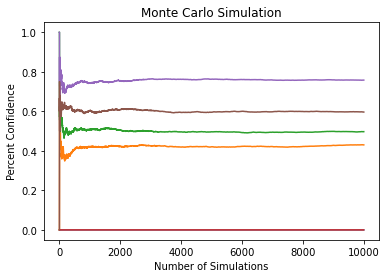

In [35]:
def get_graph(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = pd.Series(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        vals = (vals <= score).astype(int).cumsum()
        for x in range(len(vals)):
            vals.iloc[x] = vals.iloc[x] / (x+1)
        vals.plot()
    return
print('Mavericks PTS: \t' + str(get_graph(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[114.843903, 114, 109.6], 113)))
print('Opponent OPTS: \t' + str(get_graph(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [118.619597, 117, 116.8], 113)))

plt.title('Monte Carlo Simulation')
plt.ylabel('Percent Confidence')
plt.xlabel('Number of Simulations')
plt.show()





In [49]:
suns_pts = [112.20083999999999, 109.82131999999946, 110.75009999999965,124.3034, 110.9585, 111.0285]
mavs_pts = [117.4595, 116.5454, 120.3055, 112.16973999999999, 112.66921999999997, 115.97509999999967]
print("Mavs PTS: ", sum(mavs_pts)/6)
print("Suns PTS: ", sum(suns_pts)/6)

Mavs PTS:  115.85407666666661
Suns PTS:  113.17710999999986
